# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk  
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from wordcloud import WordCloud


import re 
nltk.download('stopwords')
nltk.download('vader_lexicon')
!pip install gensim
import gensim
from gensim.parsing.preprocessing import remove_stopwords
!pip install textblob
from textblob import TextBlob
from langdetect import detect
import warnings
warnings.simplefilter("ignore")





[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Data Exploration


In [2]:
#Read dataset
Obi_df = pd.read_csv('PeterObi.csv')
Bola_df = pd.read_csv('Bolatinubu.csv')
Atiku_df = pd.read_csv('Atikuabu.csv')

In [3]:
#Display the first 3 rows 
Obi_df.head(3)

,Unnamed: 0,Date,TweetURL,User,Source,Location,Tweet,Likes_Counts,Retweets_Count,Quote_Count,Reply_Count
0,0,2023-02-15 23:59:26+00:00,https://twitter.com/Bigkingzz1/status/16260083...,Bigkingzz1,Twitter for iPhone,NaN,"@DEferode @PeterObi You dey shout Jesus, na Je...",1,0,0,0
1,1,2023-02-15 23:59:24+00:00,https://twitter.com/thedreamreaper/status/1626...,thedreamreaper,Twitter for Android,NaN,@Antiok5 @ineclagos @inecnigeria @instablog9ja...,0,0,0,0
2,2,2023-02-15 23:59:18+00:00,https://twitter.com/Delejackson4/status/162600...,Delejackson4,Twitter for Android,NaN,"If not for Ethnic Sentiment, i don't think any...",2,1,0,0


In [4]:
#Display the first 3 rows 
Bola_df.head(3)

,Unnamed: 0,Date,TweetURL,User,Source,Location,Tweet,Likes_Counts,Retweets_Count,Quote_Count,Reply_Count
0,0,2023-02-15 23:59:30+00:00,https://twitter.com/Bundlehofjoy/status/162600...,Bundlehofjoy,Twitter for Android,NaN,@engloto2012 @GovWike @officialABAT Okay.,0,0,0,0
1,1,2023-02-15 23:59:18+00:00,https://twitter.com/Delejackson4/status/162600...,Delejackson4,Twitter for Android,NaN,"If not for Ethnic Sentiment, i don't think any...",2,1,0,0
2,2,2023-02-15 23:59:13+00:00,https://twitter.com/myikel203/status/162600826...,myikel203,Twitter for Android,NaN,@oluwatomiwo01 @osazenoo @officialABAT @oluwat...,0,0,0,1


In [5]:
#Display the first 3 rows 
Atiku_df.head(3)

,Unnamed: 0,Date,TweetURL,User,Source,Location,Tweet,Likes_Counts,Retweets_Count,Quote_Count,Reply_Count
0,0,2023-02-15 23:58:52+00:00,https://twitter.com/KingDGen_N/status/16260081...,KingDGen_N,Twitter Web App,NaN,"@mahbeel_A @atiku Papa, Mama, Pikin",0,0,0,0
1,1,2023-02-15 23:57:23+00:00,https://twitter.com/Invincible7god/status/1626...,Invincible7god,Twitter for Android,NaN,@atiku Na you de always pull the bigger crowd ...,112,2,0,2
2,2,2023-02-15 23:56:54+00:00,https://twitter.com/Mazi_EbubeDike/status/1626...,Mazi_EbubeDike,Twitter for Android,Jakarta Capital Region,@atiku Photoshop,0,0,0,0


In [6]:
#check the number of rows and columns the dataset 
print(Obi_df.shape)
print(Bola_df.shape)
print(Atiku_df.shape)

(50000, 11)
(50000, 11)
(50000, 11)


In [7]:
# Check the summary of the dataframe for Atiku
Obi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      50000 non-null  int64 
 1   Date            50000 non-null  object
 2   TweetURL        50000 non-null  object
 3   User            50000 non-null  object
 4   Source          50000 non-null  object
 5   Location        31988 non-null  object
 6   Tweet           50000 non-null  object
 7   Likes_Counts    50000 non-null  int64 
 8   Retweets_Count  50000 non-null  int64 
 9   Quote_Count     50000 non-null  int64 
 10  Reply_Count     50000 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 4.2+ MB


In [8]:
# Check the summary of the dataframe for Bola
Bola_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      50000 non-null  int64 
 1   Date            50000 non-null  object
 2   TweetURL        50000 non-null  object
 3   User            50000 non-null  object
 4   Source          50000 non-null  object
 5   Location        32351 non-null  object
 6   Tweet           50000 non-null  object
 7   Likes_Counts    50000 non-null  int64 
 8   Retweets_Count  50000 non-null  int64 
 9   Quote_Count     50000 non-null  int64 
 10  Reply_Count     50000 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 4.2+ MB


In [9]:
# Check the summary of the dataframe for Atiku
Atiku_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      50000 non-null  int64 
 1   Date            50000 non-null  object
 2   TweetURL        50000 non-null  object
 3   User            50000 non-null  object
 4   Source          50000 non-null  object
 5   Location        32567 non-null  object
 6   Tweet           50000 non-null  object
 7   Likes_Counts    50000 non-null  int64 
 8   Retweets_Count  50000 non-null  int64 
 9   Quote_Count     50000 non-null  int64 
 10  Reply_Count     50000 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 4.2+ MB


# Checking and Removing duplicate tweets

In [10]:
#Check for duplicate tweets by finding the intersection
common_tweets = set(Obi_df['TweetURL']).intersection(Bola_df['TweetURL'], Atiku_df['TweetURL'])
len(common_tweets)

260

In [11]:
#removing irrelevant columns
Obi_df = Obi_df.drop(columns= 'Unnamed: 0')
Bola_df = Bola_df.drop(columns='Unnamed: 0')
Atiku_df = Atiku_df.drop(columns='Unnamed: 0')

In [12]:
# Create new dataframe that do not include duplicate tweets. 
new_obi_df = Obi_df[~Obi_df['TweetURL'].isin(common_tweets)]
new_bola_df = Bola_df[~Bola_df['TweetURL'].isin(common_tweets)]
new_atiku_df = Atiku_df[~Atiku_df['TweetURL'].isin(common_tweets)]

In [13]:
#check the new number of rows and columns the dataset after removing duplicates
print(new_obi_df.shape)
print(new_bola_df.shape)
print(new_atiku_df.shape)

(49740, 10)
(49740, 10)
(49740, 10)


# Merging the 3 dataframes

In [14]:
# Adding a new column to differentiate between tweets of Obi, Bola and Atiku
new_obi_df["Candidate"]  = "OBI"
new_bola_df["Candidate"] = "BOLA"
new_atiku_df["Candidate"]= "ATIKU"

# ignore the SettingWithCopyWarning
pd.options.mode.chained_assignment = None


In [15]:
#Combine the new data frames into one dataframe
df = pd.concat([new_obi_df,new_bola_df,new_atiku_df],ignore_index=True)
#df.sort_values(by='Date')
df.head()

,Date,TweetURL,User,Source,Location,Tweet,Likes_Counts,Retweets_Count,Quote_Count,Reply_Count,Candidate
0,2023-02-15 23:59:26+00:00,https://twitter.com/Bigkingzz1/status/16260083...,Bigkingzz1,Twitter for iPhone,NaN,"@DEferode @PeterObi You dey shout Jesus, na Je...",1,0,0,0,OBI
1,2023-02-15 23:59:24+00:00,https://twitter.com/thedreamreaper/status/1626...,thedreamreaper,Twitter for Android,NaN,@Antiok5 @ineclagos @inecnigeria @instablog9ja...,0,0,0,0,OBI
2,2023-02-15 23:59:18+00:00,https://twitter.com/Delejackson4/status/162600...,Delejackson4,Twitter for Android,NaN,"If not for Ethnic Sentiment, i don't think any...",2,1,0,0,OBI
3,2023-02-15 23:59:04+00:00,https://twitter.com/MvahanNico/status/16260082...,MvahanNico,Twitter for Android,"Federal Capital Territory, Nig",@Mallam_jabeer @PeterObi Amen 🙏 🙏 🙏,1,0,0,0,OBI
4,2023-02-15 23:59:03+00:00,https://twitter.com/DonatusChiekezi/status/162...,DonatusChiekezi,Twitter for Android,NaN,"🇳🇬\n🤔""NOW THE NATIONAL ANTHEM"", &amp; Tinubu r...",0,1,0,0,OBI


In [16]:
#check for missing values 
df.isnull().sum()

Date                  0
TweetURL              0
User                  0
Source                0
Location          52869
Tweet                 0
Likes_Counts          0
Retweets_Count        0
Quote_Count           0
Reply_Count           0
Candidate             0
dtype: int64

In [17]:
loc = df['Location'].nunique()
# print number of unique entries
print(loc)

9898


In [18]:
unique_entries = df['User'].nunique()
# print number of unique entries
print(unique_entries)


58248


# Analysising the tweets with respect to time of each candidates

In [19]:
print(f" Data Available since {df.Date.min()}")
print(f" Data Available upto {df.Date.max()}")

 Data Available since 2023-01-31 12:15:51+00:00
 Data Available upto 2023-02-15 23:59:30+00:00


In [20]:
# Convert the 'date' column to datetime format
df['Date'] =  pd.to_datetime(df['Date'])
Obi_df['Date'] =  pd.to_datetime(Obi_df['Date']) 
Bola_df['Date'] =  pd.to_datetime(Bola_df['Date'])
Atiku_df['Date'] = pd.to_datetime(Atiku_df['Date'])


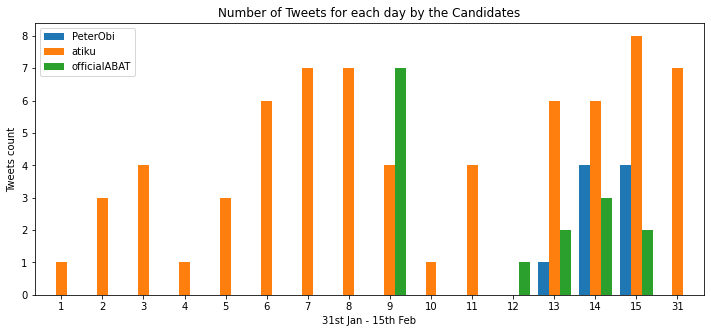

In [21]:

# Convert the date column to a datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Select only the tweets from three specific users
users = ['PeterObi', 'officialABAT', 'atiku']
user_tweets = df[df['User'].isin(users)]

# Group the user tweets by user and day of the month, and count the number of tweets in each day
tweet_count = user_tweets.groupby([user_tweets['User'], user_tweets['Date'].dt.day])['Tweet'].count()

# Pivot the tweet count data to create a grouped bar chart
tweet_count = tweet_count.reset_index().pivot(index='Date', columns='User', values='Tweet')
tweet_count.plot(kind='bar', figsize=(12, 5), width=0.8)

# Add labels and a title to the chart
plt.xlabel('31st Jan - 15th Feb')
plt.ylabel('Tweets count')
plt.title(f'Number of Tweets for each day by the Candidates')

# Rotate x-axis tick labels
plt.xticks(rotation=0)

# Add a legend to the chart
plt.legend(loc='upper left')

plt.show()



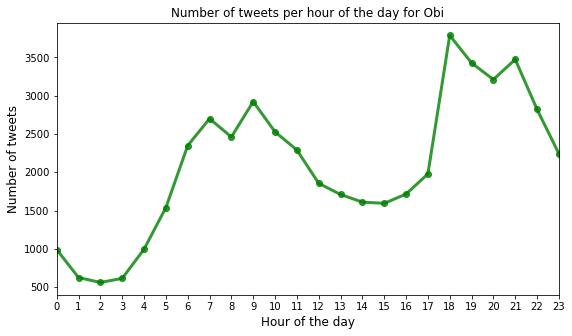

In [22]:
# Plot tweets per hour of the day for Obi
tweets_per_hour_obi = Obi_df['Date'].dt.hour.value_counts().sort_index()
plt.figure(figsize=(9,5))
plt.plot(tweets_per_hour_obi.index, tweets_per_hour_obi.values, alpha=0.8,linewidth=3, marker='o', color='green')

plt.xticks(range(24)) # Set the x-axis ticks to show all 24 hours
plt.xlim(0, 23) # Set the x-axis limits from 0 hours to 23 hours
plt.xticks(rotation='horizontal')
plt.xlabel('Hour of the day', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.title("Number of tweets per hour of the day for Obi")
plt.show()


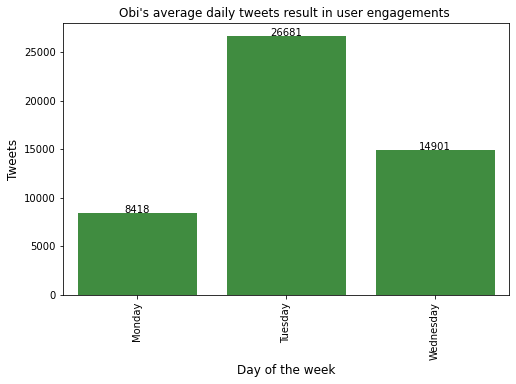

In [23]:
# Plot number of tweets per day of the week for obi
# Count the number of tweets for each day of the week and sort by day name
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tweets_per_day_obi = Obi_df['Date'].dt.day_name().value_counts().sort_index(key=lambda x: pd.Categorical(x, categories=days_order))

# Create a bar chart of the number of tweets per day of the week using sns
plt.figure(figsize=(8,5))
sns.barplot(tweets_per_day_obi.index, tweets_per_day_obi.values, alpha=0.8, color='green')

# Add the number of tweets on top of each bar
for index, value in enumerate(tweets_per_day_obi.values):
    plt.text(index, value+1, str(value), ha='center', fontsize=10)

# Customize the chart labels and title
plt.xticks(rotation='vertical')
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Tweets', fontsize=12)
plt.title("Obi's average daily tweets result in user engagements ")

# Show the chart
plt.show()


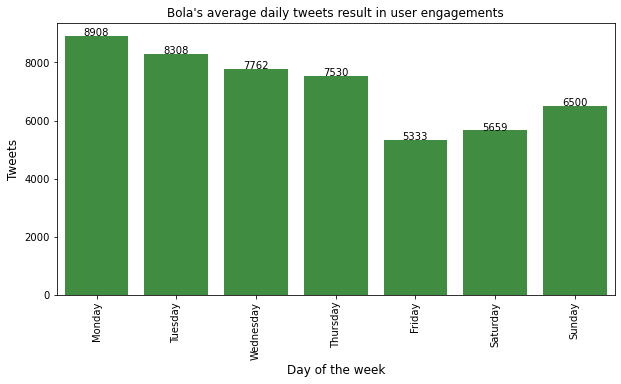

In [24]:
# Plot number of tweets per day of the week for Bola

# Count the number of tweets for each day of the week and sort by day name
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tweets_per_day_bola = Bola_df['Date'].dt.day_name().value_counts().sort_index(key=lambda x: pd.Categorical(x, categories=days_order))

# Create a bar chart of the number of tweets per day of the week using sns
plt.figure(figsize=(10,5))
sns.barplot(tweets_per_day_bola.index, tweets_per_day_bola.values, alpha=0.8, color='green')

# Add the number of tweets on top of each bar
for index, value in enumerate(tweets_per_day_bola.values):
    plt.text(index, value+1, str(value), ha='center', fontsize=10)

# Customize the chart labels and title
plt.xticks(rotation='vertical')
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Tweets', fontsize=12)
plt.title("Bola's average daily tweets result in user engagements")

# Show the chart
plt.show()

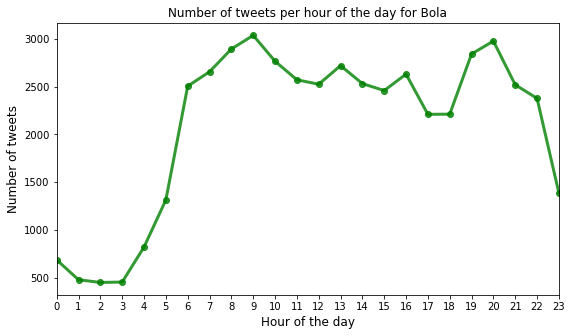

In [25]:
# Plot tweets per hour of the day for Bola
tweets_per_hour_Bola = Bola_df['Date'].dt.hour.value_counts().sort_index()
plt.figure(figsize=(9,5))
plt.plot(tweets_per_hour_Bola.index, tweets_per_hour_Bola.values, alpha=0.8,linewidth=3, marker='o', color='green')

plt.xticks(range(24)) # Set the x-axis ticks to show all 24 hours
plt.xlim(0, 23) # Set the x-axis limits from 0 hours to 23 hours
plt.xticks(rotation='horizontal')

plt.xlabel('Hour of the day', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.title("Number of tweets per hour of the day for Bola")
plt.show()

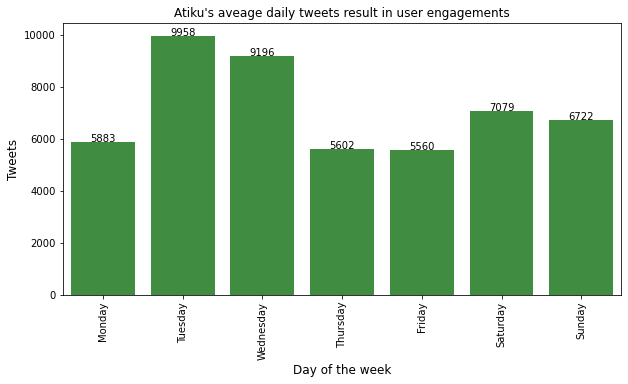

In [26]:
# Plot number of tweets per day of the week for Atiku

# Count the number of tweets for each day of the week and sort by day name
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tweets_per_day_Atiku = Atiku_df['Date'].dt.day_name().value_counts().sort_index(key=lambda x: pd.Categorical(x, categories=days_order))

# Create a bar chart of the number of tweets per day of the week using sns
plt.figure(figsize=(10,5))
sns.barplot(tweets_per_day_Atiku.index, tweets_per_day_Atiku.values, alpha=0.8, color='green')

# Add the number of tweets on top of each bar
for index, value in enumerate(tweets_per_day_Atiku.values):
    plt.text(index, value+1, str(value), ha='center', fontsize=10)
    
# Customize the chart labels and title
plt.xticks(rotation='vertical')
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Tweets', fontsize=12)
plt.title("Atiku's aveage daily tweets result in user engagements")

# Show the chart
plt.show()

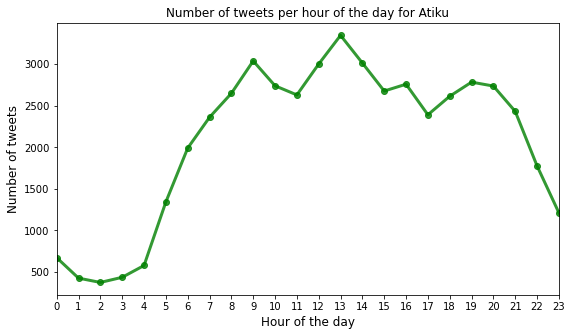

In [27]:
# Plot tweets per hour of the day for Atiku
tweets_per_hour_Atiku = Atiku_df['Date'].dt.hour.value_counts().sort_index()
plt.figure(figsize=(9,5))
plt.plot(tweets_per_hour_Atiku.index, tweets_per_hour_Atiku.values, alpha=0.8,linewidth=3, marker='o', color='green')

plt.xticks(range(24)) # Set the x-axis ticks to show all 24 hours
plt.xlim(0, 23) # Set the x-axis limits from 0 hours to 23 hours
plt.xticks(rotation='horizontal')

plt.xlabel('Hour of the day', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.title("Number of tweets per hour of the day for Atiku")
plt.show()

# Analysising the users Location

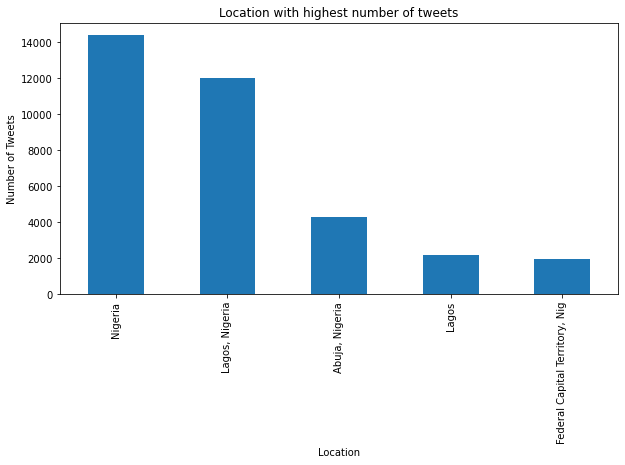

In [28]:
 # source with highest number of tweets
plt.figure(figsize=(10,5))
df.groupby('Location')['Tweet'].count().sort_values(ascending=False).head(5).plot.bar()
plt.ylabel('Number of Tweets')
plt.title('Location with highest number of tweets')
plt.show()

In [29]:
# group by sources, put count in descending order, and select top 3 locations
obi_Location = Obi_df['Location'].value_counts().nlargest(3)
bola_Location = Bola_df['Location'].value_counts().nlargest(3)
atiku_Location = Atiku_df['Location'].value_counts().nlargest(3)

# create dataframes for each candidate's top sources
Location_obi = pd.DataFrame({'Obi Tweets': obi_Location})
Location_bola = pd.DataFrame({'Bola Tweets': bola_Location})
Location_atiku = pd.DataFrame({'Atiku Tweets': atiku_Location})

# combine dataframes
Location_data = pd.concat([Location_obi,Location_bola,Location_atiku], axis=1).reset_index().rename(columns={'index': 'Location'})

# show the combined dataframe
Location_data.head()

,Location,Obi Tweets,Bola Tweets,Atiku Tweets
0,Nigeria,4674,4642,5086
1,"Lagos, Nigeria",4556,4572,2933
2,"Abuja, Nigeria",1240,1270,1778


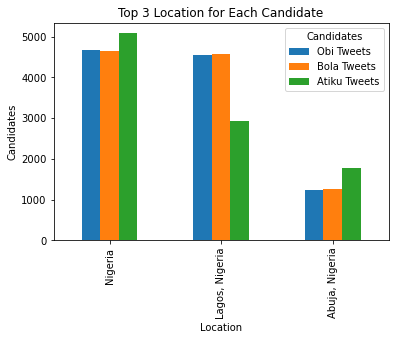

In [30]:

# plot grouped bar chart
Location_data.plot(x='Location', kind='bar')

# set plot parameters
plt.xlabel('Location')
plt.ylabel('Candidates')
plt.title('Top 3 Location for Each Candidate')
plt.legend(title='Candidates')

# show plot
plt.show()

# Analysing the source of the tweets

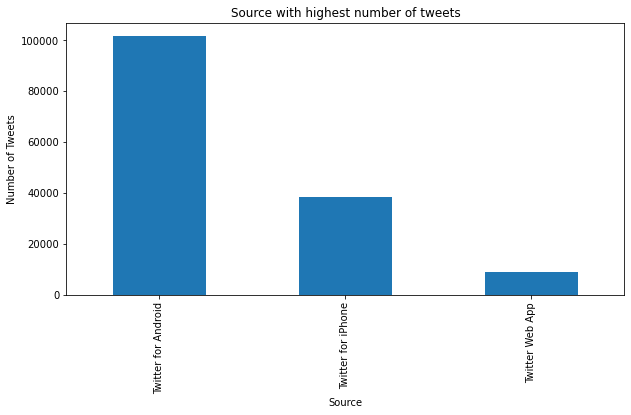

In [31]:
 # source with highest number of tweets
plt.figure(figsize=(10,5))
df.groupby('Source')['Tweet'].count().sort_values(ascending=False).head(3).plot.bar()
plt.ylabel('Number of Tweets')
plt.title('Source with highest number of tweets')
plt.show()

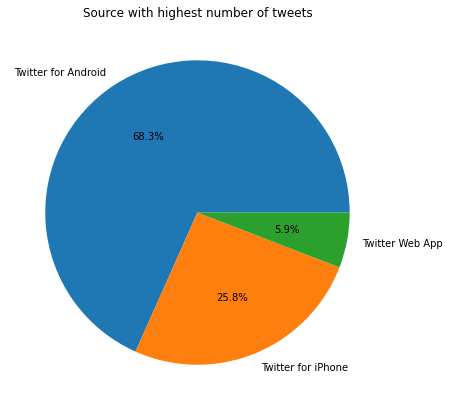

In [32]:
plt.figure(figsize=(12, 7))
counts = df.groupby('Source')['Tweet'].count().sort_values(ascending=False).head(3)
counts.plot.pie(autopct='%.1f%%', fontsize=10)
plt.ylabel('')
plt.title('Source with highest number of tweets')
plt.show()



In [33]:
# group by sources, put count in descending order, and select top 5 sources
obi_sources = Obi_df['Source'].value_counts().nlargest(3)
bola_sources = Bola_df['Source'].value_counts().nlargest(3)
atiku_sources = Atiku_df['Source'].value_counts().nlargest(3)

# create dataframes for each candidate's top sources
source1 = pd.DataFrame({'Obi Tweets': obi_sources})
source2 = pd.DataFrame({'Bola Tweets': bola_sources})
source3 = pd.DataFrame({'Atiku Tweets': atiku_sources})

# combine dataframes
source_data = pd.concat([source1, source2,source3], axis=1).reset_index().rename(columns={'index': 'source'})

# show the combined dataframe
source_data.head()

,source,Obi Tweets,Bola Tweets,Atiku Tweets
0,Twitter for Android,33331,33337,35568
1,Twitter for iPhone,13549,13653,11399
2,Twitter Web App,2992,2888,2934


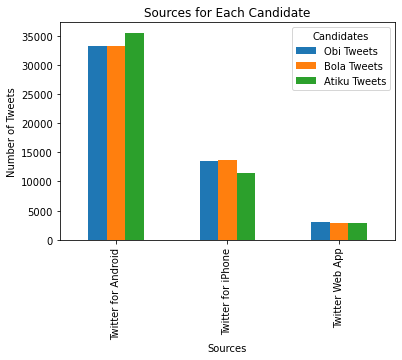

In [34]:


# plot grouped bar chart
source_data.plot(x='source', kind='bar')

# set plot parameters
plt.xlabel('Sources')
plt.ylabel('Number of Tweets')
plt.title('Sources for Each Candidate')
plt.legend(title='Candidates')

# show plot
plt.show()



# Analysing the personal tweets engagement of each candidates

In [35]:
#function to count the number ot tweets for each candidates

def tweets_count_for_candidates(tweet_dataset_path, username):
    """
    Counts the number of tweets for a given user in a tweet dataset.
    
    Args:
    - tweet_dataset_path (str): The path to the tweet dataset.
    - username (str): The username to count the number of tweets for.
    
    Returns:
    - tweet_count (int): The number of tweets for the given user in the dataset.
    """
    

    # Count the number of occurrences of each candidate
    user_counts = df["User"].value_counts()

    # Select the count of tweets for the particular user of interest
    total_tweets = user_counts.loc[username]

    # Return the tweet count
    return total_tweets

In [36]:

tweet_count_obi = tweets_count_for_candidates(df, "PeterObi")
print(f"PeterObi has {tweet_count_obi} tweets in the dataset.")


tweet_count_bola = tweets_count_for_candidates(df, "officialABAT")
print(f"Bola Tinubu has {tweet_count_bola} tweets in the dataset.")

tweet_count_atiku = tweets_count_for_candidates(df, "atiku")
print(f"Atiku Abubakar has {tweet_count_atiku} tweets in the dataset.")

PeterObi has 9 tweets in the dataset.
Bola Tinubu has 15 tweets in the dataset.
Atiku Abubakar has 68 tweets in the dataset.


In [37]:
#function to get the total retweets for each candidates
def count_user_retweets(df, username):
    # Filter the DataFrame to only include rows where the 'User' column matches the username
    user_df = df[df['User'] == username]

    # Get the total number of retweets for the user by summing up the 'Retweets' column
    retweet_count = user_df['Retweets_Count'].sum()

    # Return the result
    return retweet_count


In [38]:
count_user_retweets(df,'PeterObi')

59885

In [39]:
count_user_retweets(df,'atiku')

24586

In [40]:
count_user_retweets(df,'officialABAT')

8581

In [41]:
#function to get the total likes for each candidates
def count_user_likes(df, username):
    # Filter the DataFrame to only include rows where the 'User' column matches the username
    user_df = df[df['User'] == username]

    # Get the total number of retweets for the user by summing up the 'Retweets' column
    likes_count = user_df['Likes_Counts'].sum()

    # Return the result
    return likes_count

In [42]:
count_user_likes(df,'PeterObi')

241561

In [43]:
count_user_likes(df,'officialABAT')

38744

In [44]:
count_user_likes(df,'atiku')

91209

In [45]:
#function to get the total quotes for each candidates
def count_user_quotes(df, username):
    # Filter the DataFrame to only include rows where the 'User' column matches the username
    user_df = df[df['User'] == username]

    # Get the total number of retweets for the user by summing up the 'Retweets' column
    quote_count = user_df['Quote_Count'].sum()

    # Return the result
    return quote_count

In [46]:
count_user_quotes(df,'PeterObi')

1567

In [47]:
count_user_quotes(df,'officialABAT')

701

In [48]:
count_user_quotes(df,'atiku')

1534

In [49]:
#function to get the total replies for each candidates
def count_user_reply(df, username):
    # Filter the DataFrame to only include rows where the 'User' column matches the username
    user_df = df[df['User'] == username]

    # Get the total number of retweets for the user by summing up the 'Retweets' column
    quote_count = user_df['Reply_Count'].sum()

    # Return the result
    return quote_count

In [50]:
count_user_reply(df,'PeterObi')

6444

In [51]:
count_user_reply(df,'officialABAT')

6374

In [52]:
count_user_reply(df,'atiku')

83421

#  Public Users Tweets Engagement Analysis

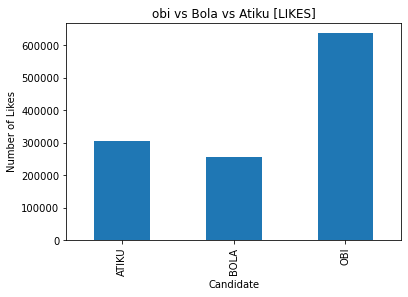

In [53]:
# Comparison of likes between candidates
df.groupby('Candidate')['Likes_Counts'].sum().plot.bar()
plt.ylabel('Number of Likes')
plt.title('obi vs Bola vs Atiku [LIKES]')
plt.show()

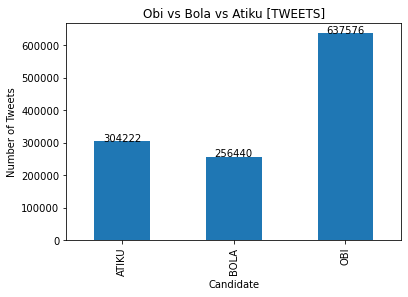

In [54]:
# Comparison of tweets between candidates

tweets_by_candidate = df.groupby('Candidate')['Likes_Counts'].sum()
ax = tweets_by_candidate.plot.bar()
ax.set_ylabel('Number of Tweets')
ax.set_title('Obi vs Bola vs Atiku [TWEETS]')

# Add text labels for each bar
for i, v in enumerate(tweets_by_candidate.values):
    ax.text(i, v, str(v), color='black', ha='center')

plt.show()


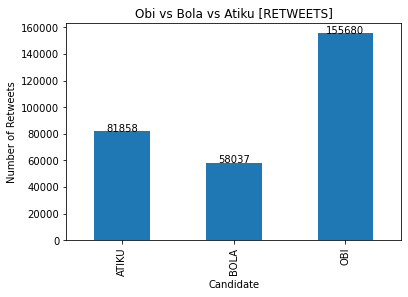

In [55]:
# Comparison of retweets between candidates
import matplotlib.pyplot as plt

retweets_by_candidate = df.groupby('Candidate')['Retweets_Count'].sum()
ax = retweets_by_candidate.plot.bar()
ax.set_ylabel('Number of Retweets')
ax.set_title('Obi vs Bola vs Atiku [RETWEETS]')

# Add text labels for each bar
for i, v in enumerate(retweets_by_candidate.values):
    ax.text(i, v, str(v), color='black', ha='center')

plt.show()


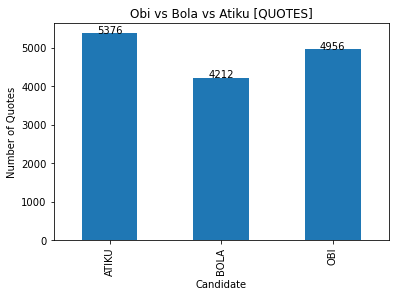

In [56]:
# Comparison of quotes between candidates

quotes_by_candidate = df.groupby('Candidate')['Quote_Count'].sum()
ax = quotes_by_candidate.plot.bar()
ax.set_ylabel('Number of Quotes')
ax.set_title('Obi vs Bola vs Atiku [QUOTES]')

# Add text labels for each bar
for i, v in enumerate(quotes_by_candidate.values):
    ax.text(i, v, str(v), color='black', ha='center')

plt.show()


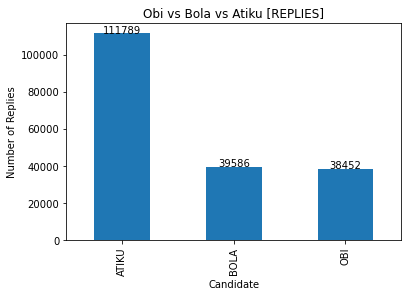

In [57]:
# Comparison of replies between candidates
import matplotlib.pyplot as plt

replies_by_candidate = df.groupby('Candidate')['Reply_Count'].sum()
ax = replies_by_candidate.plot.bar()
ax.set_ylabel('Number of Replies')
ax.set_title('Obi vs Bola vs Atiku [REPLIES]')

# Add text labels for each bar
for i, v in enumerate(replies_by_candidate.values):
    ax.text(i, v, str(v), color='black', ha='center')

plt.show()


In [58]:
pd.set_option('display.max_colwidth', 1000)

In [59]:
# to obtain the most liked tweet for Obi
# Find the row in the DataFrame 'df' with the highest Like_Count value
most_Liked_tweet = df.loc[df['Likes_Counts'].idxmax()]

# Print the most liked tweet
print(f"The most number of liked tweet for Obi was {df.Likes_Counts.max()} and below is the tweet;")
print(most_Liked_tweet['Tweet'])

The most number of liked tweet for Obi was 41896 and below is the tweet;
The market storm in Oshodi Lagos, was heartwarming. For most Nigerians, the markets are a leveler- the rich and poor buy from the same market. Nigerian traders need reassurances that a production-driven economy will result in cost-effective and sustainable consumption. -PO https://t.co/gFzBmWOoB6


In [60]:
# to obtain the most liked tweet for Bola
# Find the row in the DataFrame 'df' with the highest Like_Count value
most_Liked_tweet = Bola_df.loc[Bola_df['Likes_Counts'].idxmax()]

# Print the most liked tweet
print(f"The most number of liked tweet for Bola Tinubu was {Bola_df.Likes_Counts.max()} and below is the tweet;")
print(most_Liked_tweet['Tweet'])

The most number of liked tweet for Bola Tinubu was 6280 and below is the tweet;
Thank you the good people of Imo State. You have spoken loud and clear. We will walk together into a more peaceful and prosperous Nigeria.

I also appreciate the presence of our leader, President Muhammadu Buhari at the rally today.

Thank you!
#RenewedHope23 https://t.co/Z4DYTb2VkE


In [61]:
# to obtain the most liked tweet for Atiku
# Find the row in the DataFrame 'df' with the highest Like_Count value
most_Liked_tweet = Atiku_df.loc[Atiku_df['Likes_Counts'].idxmax()]

# Print the most liked tweet
print(f"The most number of liked tweet for Atiku was {Atiku_df.Likes_Counts.max()} and below is the tweet;")
print(most_Liked_tweet['Tweet'])

The most number of liked tweet for Atiku was 5289 and below is the tweet;
This is Bauchi State. The love and support is amazing. -AA #RecoverNigeria https://t.co/mjxu81PBhE


In [62]:
#to obtain the most Retweeted tweet by finding the row in the DataFrame 'df' with the highest 'Reply_Count' value
most_Retweeted_tweet = df.loc[df['Retweets_Count'].idxmax()]

#most retweeted tweet
print(f"The most number of retweets was {Obi_df.Retweets_Count.max()} and below is the tweet;")
print(most_Retweeted_tweet['Tweet'])

The most number of retweets was 10097 and below is the tweet;
The market storm in Oshodi Lagos, was heartwarming. For most Nigerians, the markets are a leveler- the rich and poor buy from the same market. Nigerian traders need reassurances that a production-driven economy will result in cost-effective and sustainable consumption. -PO https://t.co/gFzBmWOoB6


In [63]:
# to obtain the most replied tweet
# Find the row in the DataFrame 'df' with the highest 'Reply_Count' value
most_replied_tweet = df.loc[df['Reply_Count'].idxmax()]

print(f"The most replied tweets for Atiku had {df.Reply_Count.max()} replies and below is the tweet;")
# Print the most popular tweet's content
print(most_replied_tweet['Tweet'])


The most replied tweets for Atiku had 5038 replies and below is the tweet;
Thank you, @Dj_Abba, for this great piece in support of our mission to Recover Nigeria. -AA #RecoverNigeria https://t.co/F92SsaZtUw


In [64]:
# Find the row in the DataFrame 'df' with the highest 'Reply_Count' value
most_replied_tweet = Obi_df.loc[Obi_df['Reply_Count'].idxmax()]

print(f"The most replied tweets for Obi {Obi_df.Reply_Count.max()} replies and below is the tweet;")
# Print the most popular tweet's content
print(most_replied_tweet['Tweet'])

The most replied tweets for Obi 2311 replies and below is the tweet;
Hear! The people who were doing business with murderous Gen Abacha when he was busy assassinating pro-democracy activists in Lagos, @peterobi was busy clearing goods from Tincan Island. Men of blood. No wonder they love him https://t.co/ubl8GDiDP9


In [65]:
# Find the row in the DataFrame 'df' with the highest 'Reply_Count' value
most_replied_tweet = Bola_df.loc[Bola_df['Reply_Count'].idxmax()]

print(f"The most replied tweets for bola {Bola_df.Reply_Count.max()} replies and below is the tweet;")
# Print the most popular tweet's content
print(most_replied_tweet['Tweet'])

The most replied tweets for bola 1897 replies and below is the tweet;
Many thanks to all who showed concern yesterday after my invitation by the DSS. Special thanks to our incoming Pres. @officialABAT, incoming Vice Pres. @KashimSM, Nat. Chairman of our party @OfficialAPCNg, Sen. Adamu Abdullahi, DG of the Tinubu/Shettima PCC, Gov. Simon Lalong..1/ https://t.co/MfHpYH2mPO


# Text preprocessing

In [66]:


def clean(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    #convert input text to lower text characters
    text = str(text).lower()
    #remove square brackets 
    text = re.sub('\[.*?\]', '', text)
    #emove URLs (web links) from the input text.
    text = re.sub('https?://\S+|www\.\S+', '', text)
    #remove HTML tags from the input text
    text = re.sub('<.*?>+', '', text)
    #remove newline characters from the input text.
    text = re.sub('\n', '', text)
    #remove alphanumeric words that contain digits from the input text 
    text = re.sub('\w*\d\w*', '', text)
    #is used to remove Twitter handles (usernames) from the input text
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    #is used to remove hashtag symbols from the input text.
    text=re.sub(r'#','',text)
    #emove the "RT" (retweet) indicator and any whitespace characters from input text
    text=re.sub(r'RT[\s]+','',text)
    #remove underscores from text
    text = re.sub('_', ' ', text)
    text=re.sub(r'[^\w]', ' ', text)
    # Remove stop words and lemmatize tokens
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in text.split() if token not in stop_words]
    # Join tokens back into a string
    clean = ' '.join(tokens)
    return clean


# Sentiments using Vader

In [67]:


def getVaderPolarity(text):
    '''Compute polarity of input text using VADER'''
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(text)
    polarity = scores['compound']
    return polarity

def getVaderSentiment(polarity):
    '''Categorize polarity as positive, negative, or neutral'''
    if polarity > 0.05:
        return 'positive'
    elif polarity < -0.05:
        return 'negative'
    else:
        return 'neutral'


# Peter Obi's Sentiment distribution and Word Cloud

In [68]:
Obi_df['ClearTweet'] = Obi_df['Tweet'].apply(clean)
Obi_df['vader_polarity']= Obi_df['ClearTweet'].apply(getVaderPolarity)
Obi_df['vader_analysis'] = Obi_df['vader_polarity'].apply(getVaderSentiment)
Obi_df.vader_analysis.value_counts(normalize=True)*100

positive    41.840
neutral     36.022
negative    22.138
Name: vader_analysis, dtype: float64

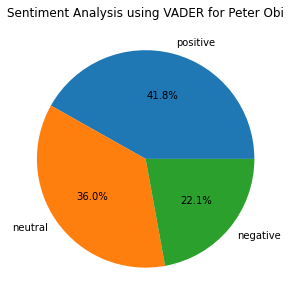

In [69]:
# Plot graph for Sentiment Analysis using TextBlob for Obi
plt.figure(figsize=(10,5))
plt.title("Sentiment Analysis using VADER for Peter Obi")
(Obi_df.vader_analysis.value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')
#remove labels on the y-axis
plt.ylabel('')
plt.show()

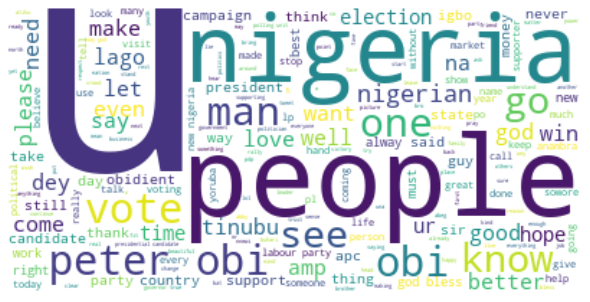

In [70]:
# to obtain positive sentiment clear tweets
postive_sentiments_obi_vader = Obi_df.loc[Obi_df['vader_analysis'] == 'positive', ['vader_analysis', 'ClearTweet']]
pos_o = postive_sentiments_obi_vader['ClearTweet']
# Generate the wordcloud
wordcloud = WordCloud(background_color='white', max_font_size=1000).generate(''.join(pos_o))
# Display the wordcloud 
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

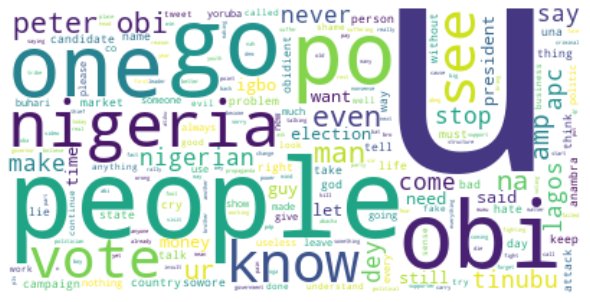

In [71]:
# to obtain negative sentiment clear tweets
negative_sentiments_obi_vader = Obi_df.loc[Obi_df['vader_analysis'] == 'negative', ['vader_analysis', 'ClearTweet']]
neg_o = negative_sentiments_obi_vader['ClearTweet']
# Generate the wordcloud
wordcloud = WordCloud(background_color='white', max_font_size=1000).generate(''.join(neg_o))
# Display the wordcloud using matplotlib
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


# Bola Tinubu's sentiment and Word Cloud 

In [72]:
Bola_df['ClearTweet'] = Bola_df['Tweet'].apply(clean)
Bola_df['vader_polarity']= Bola_df['ClearTweet'].apply(getVaderPolarity)
Bola_df['vader_analysis'] = Bola_df['vader_polarity'].apply(getVaderSentiment)
Bola_df.vader_analysis.value_counts(normalize=True)*100


positive    36.934
neutral     36.304
negative    26.762
Name: vader_analysis, dtype: float64

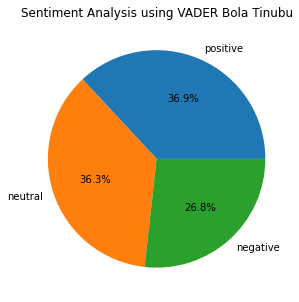

In [73]:
# Plot graph for Sentiment Analysis using TextBlob for Bola
plt.figure(figsize=(10,5))
plt.title("Sentiment Analysis using VADER Bola Tinubu")
(Bola_df.vader_analysis.value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')
#remove labels on the y-axis
plt.ylabel('')
# Add a legend to the chart
plt.show()

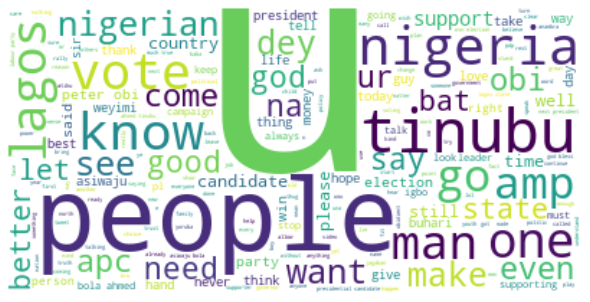

In [74]:
# to obtain positive sentiment clear tweets
postive_sentiments_bola_vader = Bola_df.loc[Bola_df['vader_analysis'] == 'positive', ['vader_analysis', 'ClearTweet']]
pos_b = postive_sentiments_bola_vader['ClearTweet']
# Generate the wordcloud
wordcloud = WordCloud(background_color='white', max_font_size=1000).generate(''.join(pos_b))
# Display the wordcloud using matplotlib
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


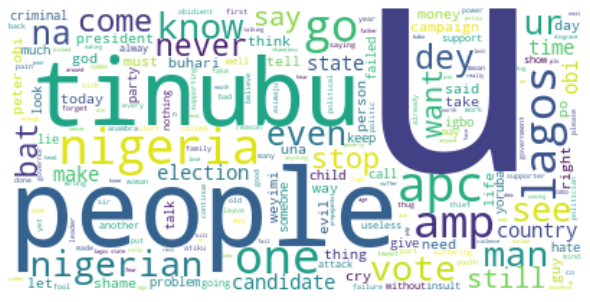

In [75]:
# to obtain negative sentiment clear tweets
negative_sentiments_bola_vader = Bola_df.loc[Bola_df['vader_analysis'] == 'negative', ['vader_analysis', 'ClearTweet']]
neg_b = negative_sentiments_bola_vader['ClearTweet']
# Generate the wordcloud
wordcloud = WordCloud(background_color='white', max_font_size=1000).generate(''.join(neg_b))
# Display the wordcloud using matplotlib
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Atiku Abubakar's sentiment and Word Cloud

In [76]:
Atiku_df['ClearTweet'] = Atiku_df['Tweet'].apply(clean)
Atiku_df['vader_polarity']= Atiku_df['ClearTweet'].apply(getVaderPolarity)
Atiku_df['vader_analysis'] = Atiku_df['vader_polarity'].apply(getVaderSentiment)
Atiku_df.vader_analysis.value_counts(normalize=True)*100

neutral     40.748
positive    37.982
negative    21.270
Name: vader_analysis, dtype: float64

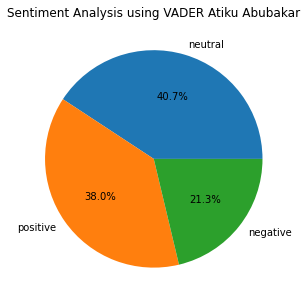

In [77]:
# Plot graph for Sentiment Analysis using TextBlob for Bola
plt.figure(figsize=(10,5))
plt.title("Sentiment Analysis using VADER Atiku Abubakar")
(Atiku_df.vader_analysis.value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')
#remove labels on the y-axis
plt.ylabel('')
# Add a legend to the chart
plt.show()

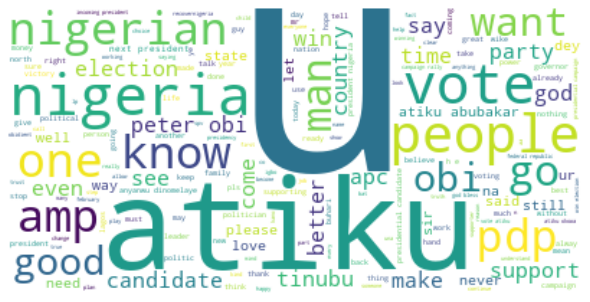

In [78]:
# to obtain positive sentiment clear tweets
postive_sentiments_atiku_vader = Atiku_df.loc[Atiku_df['vader_analysis'] == 'positive', ['vader_analysis', 'ClearTweet']]
pos_a = postive_sentiments_atiku_vader['ClearTweet']

# Generate the wordcloud
wordcloud = WordCloud(background_color='white', max_font_size=1000).generate(''.join(pos_a))
# Display the wordcloud using matplotlib
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

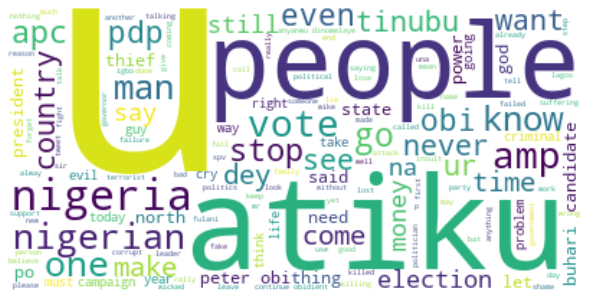

In [79]:
# to obtain negative sentiment clear tweets
negative_sentiments_atiku_vader = Atiku_df.loc[Atiku_df['vader_analysis'] == 'negative', ['vader_analysis', 'ClearTweet']]
neg_a = negative_sentiments_atiku_vader['ClearTweet']

# Generate the wordcloud
wordcloud = WordCloud(background_color='white', max_font_size=1000).generate(''.join(neg_a))
# Display the wordcloud using matplotlib
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Graph showing the sentiment distributions among the candidates

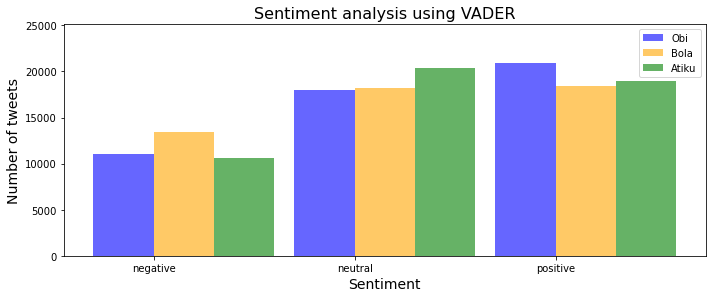

In [83]:
# Define the sentiment labels
vader_analysis = ['negative', 'neutral', 'positive']

# Compute the sentiment frequencies for each candidate
obi_sentiment_freq_v = pd.value_counts(Obi_df['vader_analysis']).reindex(vader_analysis, fill_value=0) / Obi_df.shape[0]
bola_sentiment_freq_v = pd.value_counts(Bola_df['vader_analysis']).reindex(vader_analysis, fill_value=0) / Bola_df.shape[0]
atiku_sentiment_freq_v = pd.value_counts(Atiku_df['vader_analysis']).reindex(vader_analysis, fill_value=0) / Atiku_df.shape[0]

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Sentiment analysis using VADER', fontsize=16)

# Plot the sentiment frequencies for Obi
ax.bar(np.array([1, 2, 3]) - 0.15, Obi_df.groupby('vader_analysis').size().reindex(vader_analysis, fill_value=0), width=0.3, align='center', color='blue', alpha=0.6, label='Obi')

# Plot the sentiment frequencies for Bola
ax.bar(np.array([1, 2, 3]) + 0.15, Bola_df.groupby('vader_analysis').size().reindex(vader_analysis, fill_value=0), width=0.3, align='center', color='orange', alpha=0.6, label='Bola')

# Plot the sentiment frequencies for Atiku
ax.bar(np.array([1, 2, 3]) + 0.45, Atiku_df.groupby('vader_analysis').size().reindex(vader_analysis, fill_value=0), width=0.3, align='center', color='green', alpha=0.6, label='Atiku')

# Set the axis limits and labels
ax.set_ylim(0, max(Obi_df.groupby('vader_analysis').size().max(), Bola_df.groupby('vader_analysis').size().max(), Atiku_df.groupby('vader_analysis').size().max()) * 1.2)
ax.set_xlabel('Sentiment', fontsize=14)
ax.set_ylabel('Number of tweets', fontsize=14)
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(vader_analysis)

# Add a legend
ax.legend()

# Adjust the plot layout
fig.tight_layout(rect=[0, 0.03, 1, 0.88])

# Display the plot
plt.show()


# Building Machine Learning Models to analyse subsequent Tweets


In [84]:
# merging the 3 data frame to contain cleartweet and polarity
obi = Obi_df[['ClearTweet','vader_polarity']]
bola = Bola_df[['ClearTweet','vader_polarity']]
atiku = Atiku_df[['ClearTweet','vader_polarity']]
# concatenate the data frames vertically
combined_df = pd.concat([obi, bola, atiku], axis=0)

In [85]:
combined_df.head(2)

,ClearTweet,vader_polarity
0,dey shout jesus na jesus tell una dey sell money give poor citizen fault vote,-0.7003
1,tagging inec complete waste time though everything lie hand people must watch red eye,0.1027


In [86]:
# convert the target variable to numerical
combined_df['sentiment_class'] = np.where(combined_df['vader_polarity'] > 0, 2, np.where(combined_df['vader_polarity'] == 0, 1, 0))


In [87]:
combined_df.head(10)

,ClearTweet,vader_polarity,sentiment_class
0,dey shout jesus na jesus tell una dey sell money give poor citizen fault vote,-0.7003,0
1,tagging inec complete waste time though everything lie hand people must watch red eye,0.1027,2
2,ethnic sentiment think right thinking man would support sin humanity,-0.2263,0
3,jabeer amen,0.0000,1
4,national anthem amp tinubu raised two hand haba baba oshio shock sotee shout make una leave man contested jan election amp vote family lp take back nigeria,0.1027,2
5,lol cheap slave,0.4215,2
6,bribing election e choke gan,-0.5423,0
7,pvc ready,0.3612,2
8,want first settle southern region next week put effort northern regionhis popularity south would make news make easier gather crowd north merge kwankwaso might two,0.7351,2
9,swear mad people full everywhere,-0.5267,0


In [88]:
combined_df['sentiment_class'].value_counts()

2    59224
1    55032
0    35744
Name: sentiment_class, dtype: int64

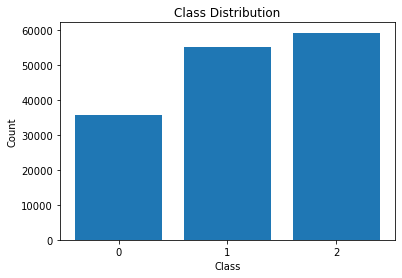

In [89]:
import matplotlib.pyplot as plt

# Define the class labels and their corresponding counts
labels = ['0', '1', '2']
counts = [35744, 55032, 59224]

# Create a bar chart with the class labels as x-axis and their counts as y-axis
plt.bar(labels, counts)

# Add labels and title to the chart
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

# Display the chart
plt.show()


# Naive Bayes classifier

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
from sklearn.feature_extraction.text import CountVectorizer
# Split data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(combined_df["ClearTweet"], combined_df["sentiment_class"],
                                                                    test_size=0.2, random_state=42)


# Extract features using bag-of-words model
vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform(train_features)
test_features = vectorizer.transform(test_features)



# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(train_features, train_labels)
test_predictions_nb = nb_classifier.predict(test_features)

# creating a functiom to Evaluate classifier

def metrics(prediction, actual): 
    print('Confusion_matrix \n', confusion_matrix(actual, prediction))
    print('\nAccuracy:', accuracy_score(actual, prediction))
    print('\nPrecision:', precision_score(actual, prediction, average='weighted'))
    print('\nclassification_report\n')
    print(classification_report(actual, prediction))
   
metrics(test_predictions_nb, test_labels )  








Confusion_matrix 
 [[ 5816   183  1230]
 [  723  6276  3937]
 [ 1033   221 10581]]

Accuracy: 0.7557666666666667

Precision: 0.7926340261244748

classification_report

              precision    recall  f1-score   support

           0       0.77      0.80      0.79      7229
           1       0.94      0.57      0.71     10936
           2       0.67      0.89      0.77     11835

    accuracy                           0.76     30000
   macro avg       0.79      0.76      0.76     30000
weighted avg       0.79      0.76      0.75     30000



# Support Vector Machines (SVM) 

In [91]:
# Split data into training and testing sets
train_feature, test_feature, train_label, test_label = train_test_split(combined_df["ClearTweet"], combined_df["sentiment_class"],
                                                                    test_size=0.2, random_state=42)

from sklearn.svm import LinearSVC
# Extract features using bag-of-words model
vectorizer = CountVectorizer()
train_feature = vectorizer.fit_transform(train_feature)
test_feature = vectorizer.transform(test_feature)

# Train Linear Support Vector Machine Classifier
svm_classifier = LinearSVC()
svm = svm_classifier.fit(train_feature, train_label)
predictions_svm = svm.predict(test_feature)


metrics(predictions_svm, test_label)  


Confusion_matrix 
 [[ 6586   170   473]
 [   57 10798    81]
 [  461   153 11221]]

Accuracy: 0.9535

Precision: 0.9532811884870316

classification_report

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7229
           1       0.97      0.99      0.98     10936
           2       0.95      0.95      0.95     11835

    accuracy                           0.95     30000
   macro avg       0.95      0.95      0.95     30000
weighted avg       0.95      0.95      0.95     30000



# Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier

# Split data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(combined_df["ClearTweet"],combined_df["sentiment_class"],
                                                                    test_size=0.2,random_state=42)

# Extract features using bag-of-words model
vectorizer = CountVectorizer()
train_data = vectorizer.fit_transform(train_data)
test_data = vectorizer.transform(test_data)


# Train a decision tree classifier on the vectorized tweets
dt_classifier = DecisionTreeClassifier()
dt = dt_classifier.fit(train_data, train_labels)
dt_predictions = dt.predict(test_data)

metrics(dt_predictions, test_labels) 




Confusion_matrix 
 [[ 5541   331  1357]
 [  132 10658   146]
 [ 1166   287 10382]]

Accuracy: 0.8860333333333333

Precision: 0.8843979256767612

classification_report

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      7229
           1       0.95      0.97      0.96     10936
           2       0.87      0.88      0.88     11835

    accuracy                           0.89     30000
   macro avg       0.88      0.87      0.87     30000
weighted avg       0.88      0.89      0.88     30000

